In [64]:
# Carga de librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Carga de librerías para supuestos, notación y pruebas de hipótesis 
import statsmodels.api as sm

import statsmodels.formula.api as sms
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [65]:
# Carga de base de datos a trabajar
datos=pd.read_csv("Walmart.csv", sep=',')
datos

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [66]:
datos.rename({'Store':'Tienda','Date':'Fecha','Weekly_Sales':'Ventas',
             'Holiday_Flag':'SemFestiva','Temperature':'Temperatura','Fuel_Price':'CosCombustible',
             'CPI':'IPC','Unemployment':'Desempleo'}, axis=1, inplace=True)

In [67]:
# Estadistica descriptiva de variables cuantitativas
datos.describe()

,Tienda,Ventas,SemFestiva,Temperatura,CosCombustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [68]:
datos.dtypes

Tienda              int64
Fecha              object
Ventas            float64
SemFestiva          int64
Temperatura       float64
CosCombustible    float64
IPC               float64
Desempleo         float64
dtype: object

In [69]:
datos

,Tienda,Fecha,Ventas,SemFestiva,Temperatura,CosCombustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


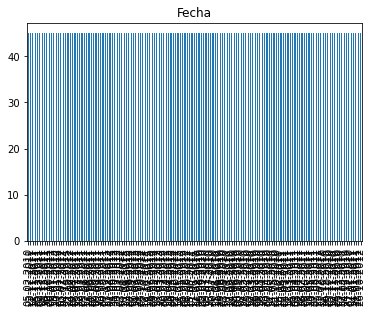

In [70]:
# Gráfico de barras para variables cualitativas
for i in datos.select_dtypes(['object']).columns.difference(['modelo']):
    if datos[i].dtype=='object':
        datos[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()

In [71]:
#Identificación de variable cuantitativas y cualitativas
datos['Tienda'] = datos['Tienda'].astype('object')
datos['SemFestiva'] = datos['SemFestiva'].astype('object')

In [72]:
var_cuan = datos.select_dtypes('number').columns
var_cual =datos.select_dtypes('object').columns

In [73]:
datos.describe()

,Ventas,Temperatura,CosCombustible,IPC,Desempleo
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


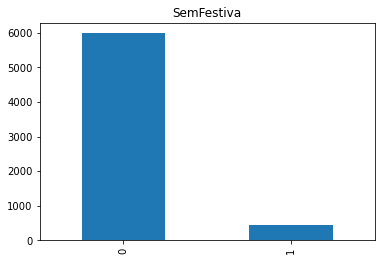

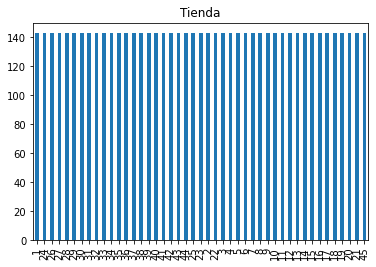

In [74]:
datos=datos.drop(columns=['Fecha'])
# Gráfico de barras para variables cualitativas
for i in datos.select_dtypes(['object']).columns.difference(['modelo']):
    if datos[i].dtype=='object':
        datos[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()

In [75]:
datos.describe(include='object')

,Tienda,SemFestiva
count,6435,6435
unique,45,2
top,1,0
freq,143,5985


In [76]:
# Datos perdidos
datos.isna().sum()

Tienda            0
Ventas            0
SemFestiva        0
Temperatura       0
CosCombustible    0
IPC               0
Desempleo         0
dtype: int64

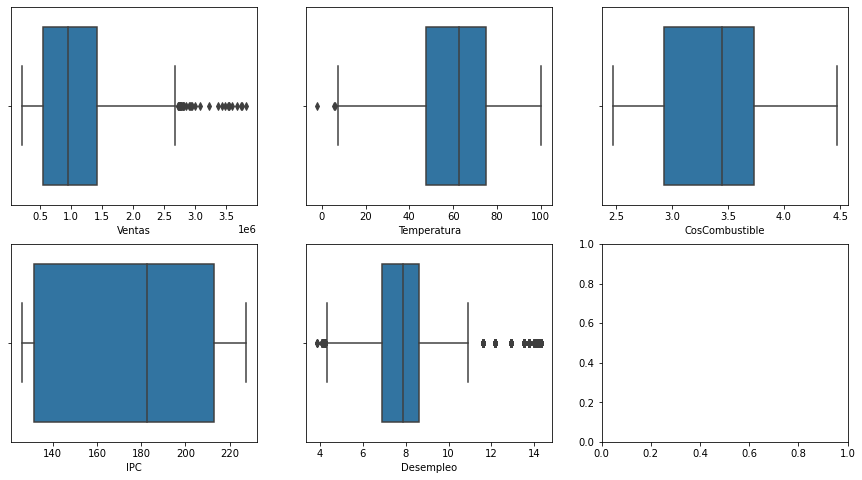

In [77]:
# Datos atípicos
# Box plots
fig, axs = plt.subplots(2,3, figsize = (15,8))
plt1 = sns.boxplot(datos['Ventas'], ax = axs[0,0])
plt2 = sns.boxplot(datos['Temperatura'], ax = axs[0,1])
plt3 = sns.boxplot(datos['CosCombustible'], ax = axs[0,2])
plt4 = sns.boxplot(datos['IPC'], ax = axs[1,0])
plt5 = sns.boxplot(datos['Desempleo'], ax = axs[1,1])

In [78]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_A = datos.Ventas.quantile(0.25)
Q3_A = datos.Ventas.quantile(0.75)
IQR_A = Q3_A - Q1_A  #rango intercuartil
print(IQR_A)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
datos = datos[~((datos['Ventas'] < (Q1_A - 1.5 * IQR_A)) |(datos['Ventas'] > (Q3_A + 1.5 * IQR_A)))]
datos.shape

866808.5549999999


(6401, 7)

In [79]:
Q1_A = datos.Temperatura.quantile(0.25)
Q3_A = datos.Temperatura.quantile(0.75)
IQR_A = Q3_A - Q1_A  #rango intercuartil
print(IQR_A)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
datos = datos[~((datos['Temperatura'] < (Q1_A - 1.5 * IQR_A)) |(datos['Temperatura'] > (Q3_A + 1.5 * IQR_A)))]
datos.shape

27.340000000000003


(6398, 7)

In [80]:
Q1_A = datos.Desempleo.quantile(0.25)
Q3_A = datos.Desempleo.quantile(0.75)
IQR_A = Q3_A - Q1_A  #rango intercuartil
print(IQR_A)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
datos = datos[~((datos['Desempleo'] < (Q1_A - 1.5 * IQR_A)) |(datos['Desempleo'] > (Q3_A + 1.5 * IQR_A)))]
datos.shape

1.7309999999999999


(5917, 7)

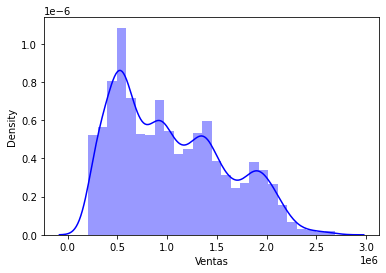

In [81]:
# Gráfica de distribución de variable Ventas
plot_TV = sns.distplot(datos['Ventas'],color="blue")

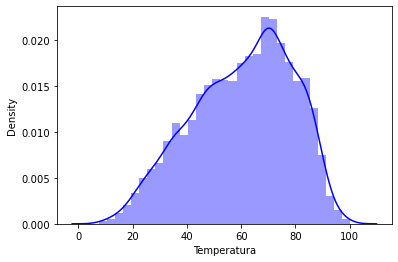

In [82]:
# Gráfica de distribución de variable Temperatura
plot_TV = sns.distplot(datos['Temperatura'],color="blue")

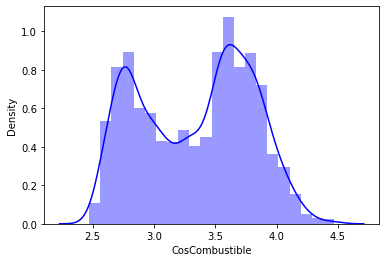

In [83]:
# Gráfica de distribución de variable CosCombustible
plot_TV = sns.distplot(datos['CosCombustible'],color="blue")

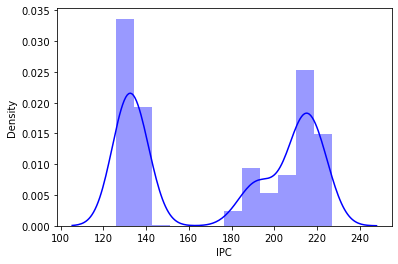

In [84]:
# Gráfica de distribución de variable IPC
plot_TV = sns.distplot(datos['IPC'],color="blue")

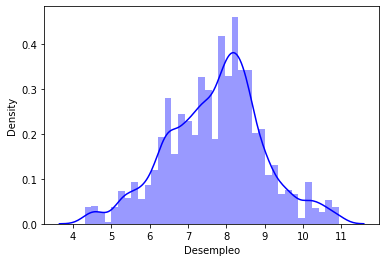

In [85]:
# Gráfica de distribución de variable Desempleo
plot_TV = sns.distplot(datos['Desempleo'],color="blue")

In [86]:
datos.corr().style.background_gradient(cmap='coolwarm')

,Ventas,Temperatura,CosCombustible,IPC,Desempleo
Ventas,1.000000,-0.041686,0.019664,-0.082977,-0.073092
Temperatura,-0.041686,1.000000,0.145157,0.217847,0.024204
CosCombustible,0.019664,0.145157,1.000000,-0.144515,-0.105214
IPC,-0.082977,0.217847,-0.144515,1.000000,-0.219020
Desempleo,-0.073092,0.024204,-0.105214,-0.219020,1.000000


In [87]:
# Recodificación de las variables categoricas

# Librería
from sklearn.preprocessing import LabelEncoder

# Conjuntos por tipo de variables
var_cuan = datos.select_dtypes('number').columns
var_cual =datos.select_dtypes('object').columns

# Creamos la instancia del objeto
labelencoder = LabelEncoder()

datos[var_cual] = datos[var_cual].apply(LabelEncoder().fit_transform)
datos

,Tienda,Ventas,SemFestiva,Temperatura,CosCombustible,IPC,Desempleo
0,0,1643690.90,0,42.31,2.572,211.096358,8.106
1,0,1641957.44,1,38.51,2.548,211.242170,8.106
2,0,1611968.17,0,39.93,2.514,211.289143,8.106
3,0,1409727.59,0,46.63,2.561,211.319643,8.106
4,0,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,44,713173.95,0,64.88,3.997,192.013558,8.684
6431,44,733455.07,0,64.89,3.985,192.170412,8.667
6432,44,734464.36,0,54.47,4.000,192.327265,8.667
6433,44,718125.53,0,56.47,3.969,192.330854,8.667


In [88]:
datos.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Ventas,SemFestiva,Temperatura,CosCombustible,IPC,Desempleo
Tienda,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Ventas,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
SemFestiva,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperatura,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
CosCombustible,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
IPC,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Desempleo,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [92]:
log_ventas = np.log(datos.Ventas)
datos['log_ventas'] = log_ventas
datos

,Tienda,Ventas,SemFestiva,Temperatura,CosCombustible,IPC,Desempleo,log_ventas,ln_Ventas
0,0,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,14.312455
1,0,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,14.311400
2,0,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,14.292966
3,0,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,14.158907
4,0,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,14.256862
...,...,...,...,...,...,...,...,...,...
6430,44,713173.95,0,64.88,3.997,192.013558,8.684,13.477481,13.477481
6431,44,733455.07,0,64.89,3.985,192.170412,8.667,13.505522,13.505522
6432,44,734464.36,0,54.47,4.000,192.327265,8.667,13.506897,13.506897
6433,44,718125.53,0,56.47,3.969,192.330854,8.667,13.484400,13.484400


In [96]:
from sklearn.preprocessing import LabelEncoder

In [98]:
labelencoder = LabelEncoder()

In [100]:
datos.Tienda = labelencoder.fit_transform(datos.Tienda)

In [101]:
regresion = ols("log_ventas ~ Tienda + SemFestiva + Temperatura + CosCombustible + IPC + Desempleo", data=datos).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     108.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.16e-130
Time:                        20:25:46   Log-Likelihood:                -4924.0
No. Observations:                5917   AIC:                             9862.
Df Residuals:                    5910   BIC:                             9909.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.1801      0.092    154.

In [102]:
regresion1 = ols("log_ventas ~ Tienda + Temperatura + CosCombustible + IPC + Desempleo", data=datos).fit()
print(regresion1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.55e-131
Time:                        20:26:34   Log-Likelihood:                -4924.5
No. Observations:                5917   AIC:                             9861.
Df Residuals:                    5911   BIC:                             9901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.1866      0.091    155.

In [104]:
datos.dtypes

Tienda              int64
Ventas            float64
SemFestiva          int32
Temperatura       float64
CosCombustible    float64
IPC               float64
Desempleo         float64
log_ventas        float64
ln_Ventas         float64
dtype: object

In [105]:
# Creamos el dataframe del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
datos2=datos[datos.columns.difference(['log_ventas','ln_Ventas','Ventas'])]
datos2

vif_data = pd.DataFrame()
vif_data["feature"] = datos2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(datos2.values, i) for i in range(len(datos2.columns))]

print(vif_data)

          feature        VIF
0  CosCombustible  29.277793
1       Desempleo  27.237739
2             IPC  17.043546
3      SemFestiva   1.100140
4     Temperatura  13.264382
5          Tienda   4.287200


In [106]:
regresion1 = ols("log_ventas ~ Tienda + Temperatura + IPC + Desempleo", data=datos).fit()
print(regresion1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.12e-131
Time:                        20:30:41   Log-Likelihood:                -4927.4
No. Observations:                5917   AIC:                             9865.
Df Residuals:                    5912   BIC:                             9898.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.3435      0.064    222.715      

In [108]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = datos2.columns.difference(['CosCombustible'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(datos2[datos2.columns.difference(['CosCombustible'])].values,i) \
                                             for i in range(len(datos2[datos2.columns.difference(['CosCombustible'])].columns))]

print(vif_data)

       feature        VIF
0    Desempleo  19.366822
1          IPC  15.070455
2   SemFestiva   1.100093
3  Temperatura  12.236860
4       Tienda   4.248526


In [109]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = datos2.columns.difference(['CosCombustible','Desempleo'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(datos2[datos2.columns.difference(['CosCombustible','Desempleo'])].values,i) \
                                             for i in range(len(datos2[datos2.columns.difference(['CosCombustible','Desempleo'])].columns))]

print(vif_data)

       feature        VIF
0          IPC  10.601849
1   SemFestiva   1.089409
2  Temperatura  10.588892
3       Tienda   3.155075


In [110]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = datos2.columns.difference(['CosCombustible','Desempleo','IPC'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(datos2[datos2.columns.difference(['CosCombustible','Desempleo','IPC'])].values,i) \
                                             for i in range(len(datos2[datos2.columns.difference(['CosCombustible','Desempleo','IPC'])].columns))]

print(vif_data)

       feature       VIF
0   SemFestiva  1.056162
1  Temperatura  2.998873
2       Tienda  3.026571


In [114]:
regresion2 = ols("log_ventas ~ Tienda + Temperatura", data=datos).fit()
print(regresion2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     260.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.55e-109
Time:                        20:39:24   Log-Likelihood:                -4984.1
No. Observations:                5917   AIC:                             9974.
Df Residuals:                    5914   BIC:                             9994.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.1327      0.028    501.447      

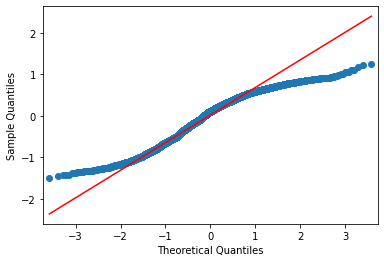

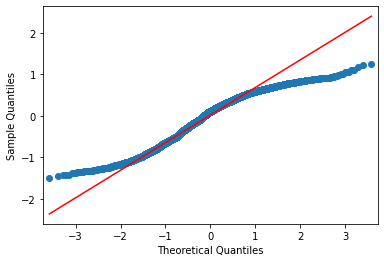

In [115]:
# Normalidad en de los residuos
sm.qqplot(regresion2.resid, line='q')

In [116]:
# Prueba de Jarque Bera
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(regresion2.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 354.7219004306503),
 ('Chi^2 two-tail prob.', 9.399787082395347e-78),
 ('Skew', -0.4586352248332532),
 ('Kurtosis', 2.227079695137357)]

In [117]:
regresion2.resid.mean()

-6.244718373561705e-15

Text(0.5, 1.0, 'Gráfica de residuos')

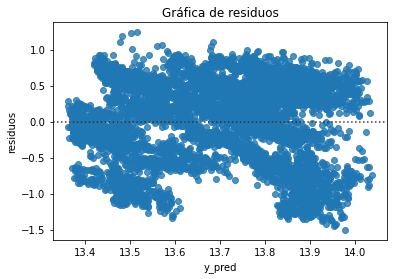

In [118]:
# Homocedasticidad
y_pred=regresion2.predict()
sns.residplot(y_pred, regresion2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

In [120]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(regresion2.resid, regresion2.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 277.12126002449963),
 ('p-value', 6.666271181738347e-61),
 ('f-value', 145.29524546054415),
 ('f p-value', 2.5139656271684492e-62)]

In [122]:
datos2

,CosCombustible,Desempleo,IPC,SemFestiva,Temperatura,Tienda
0,2.572,8.106,211.096358,0,42.31,0
1,2.548,8.106,211.242170,1,38.51,0
2,2.514,8.106,211.289143,0,39.93,0
3,2.561,8.106,211.319643,0,46.63,0
4,2.625,8.106,211.350143,0,46.50,0
...,...,...,...,...,...,...
6430,3.997,8.684,192.013558,0,64.88,44
6431,3.985,8.667,192.170412,0,64.89,44
6432,4.000,8.667,192.327265,0,54.47,44
6433,3.969,8.667,192.330854,0,56.47,44


In [124]:
# Predicción
datos3=datos2[datos2.columns.difference(['Temperatura', 'Tienda'])]
regresion2.predict()

array([14.01374825, 14.02443576, 14.020442  , ..., 13.44160077,
       13.43597576, 13.42928201])

In [129]:
y_pred=regresion2.predict(datos2)
y_pred
datos.log_ventas
df = pd.DataFrame()
df['Real'] = datos.log_ventas
df['Prediccion'] = y_pred
print(df)

           Real  Prediccion
0     14.312455   14.013748
1     14.311400   14.024436
2     14.292966   14.020442
3     14.158907   14.001598
4     14.256862   14.001964
...         ...         ...
6430  13.477481   13.412323
6431  13.505522   13.412294
6432  13.506897   13.441601
6433  13.484400   13.435976
6434  13.541444   13.429282

[5917 rows x 2 columns]


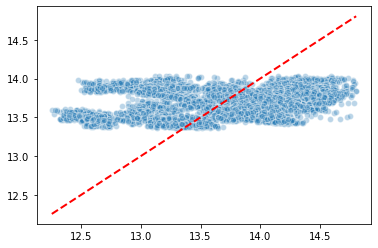

In [130]:
plt.scatter(datos.log_ventas, y_pred, edgecolors=(1, 1, 1), alpha = 0.3)
plt.plot([datos.log_ventas.min(),datos.log_ventas.max()], [datos.log_ventas.min(), datos.log_ventas.max()],
                'k--', color = 'red', lw=2)
plt.show()